In [1]:
import numpy as np
import pickle
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

%matplotlib inline
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')
import scripts.map_and_average as mapper
import scripts.util_feature_learning as util_feature_learning

## Load data

In [4]:
trainset, valset, testset = mapper.load_train_val_test_sets()
traindata, trainlabels, trainaudiolabels = trainset
valdata, vallabels, valaudiolabels = valset
testdata, testlabels, testaudiolabels = testset
labels = np.concatenate((trainlabels, vallabels, testlabels)).ravel()
audiolabels = np.concatenate((trainaudiolabels, valaudiolabels, testaudiolabels)).ravel()
print traindata.shape, valdata.shape, testdata.shape

(209292, 840) (70087, 840) (69766, 840)


## Coefficients LDA transform

mapping rhy
training with PCA transform...
variance explained 1.0
138 400
training with PCA transform...
variance explained 0.98999089448
training with LDA transform...
variance explained 1.0
done fitting
mapping mel
training with PCA transform...
variance explained 1.0
214 240
training with PCA transform...
variance explained 0.990347897477
training with LDA transform...
variance explained 1.0
done fitting
mapping mfc
training with PCA transform...
variance explained 1.0
39 80
training with PCA transform...
variance explained 0.991458741216
training with LDA transform...
variance explained 0.942657629903
done fitting
mapping chr
training with PCA transform...
variance explained 1.0
70 120
training with PCA transform...
variance explained 0.990499326107
training with LDA transform...
variance explained 0.954607427999
done fitting


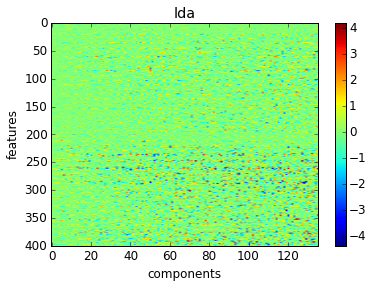

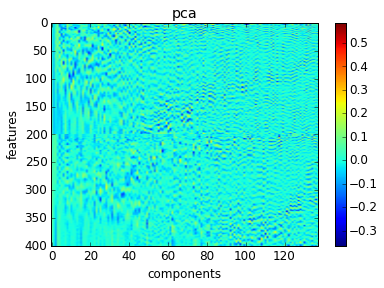

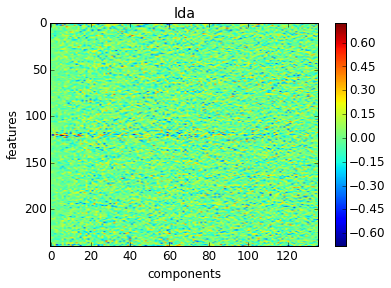

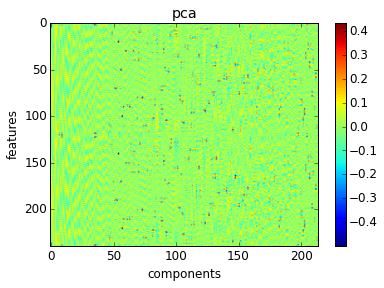

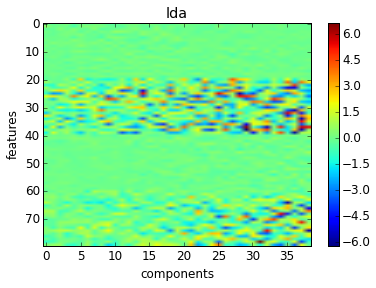

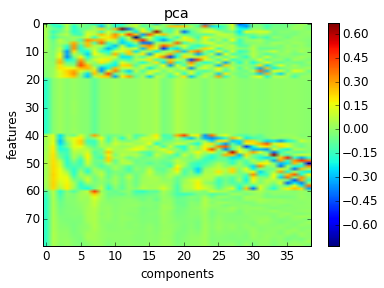

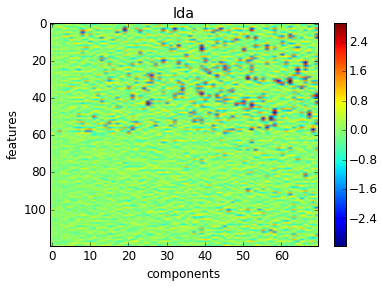

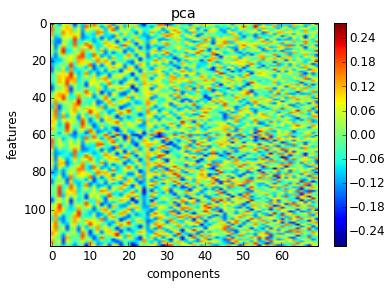

In [12]:
min_variance = 0.99
feat_labels, feat_inds = mapper.get_feat_inds(n_dim=traindata.shape[1])
for i in range(len(feat_inds)):
    print "mapping " + feat_labels[i]
    inds = feat_inds[i]
    ssm_feat = util_feature_learning.Transformer()
    if min_variance is not None:
        ssm_feat.fit_data(traindata[:, inds], trainlabels, n_components=len(inds), pca_only=True)
        n_components = np.where(ssm_feat.pca_transformer.explained_variance_ratio_.cumsum()>min_variance)[0][0]+1
        print n_components, len(inds)
        ssm_feat.fit_lda_data(traindata[:, inds], trainlabels.ravel(), n_components=n_components)
        print "done fitting"
        
        WW = ssm_feat.lda_transformer.scalings_
        plt.figure()
        plt.imshow(WW[:, :n_components], aspect='auto')
        plt.colorbar()
        plt.title('lda')
        plt.xlabel('components')
        plt.ylabel('features')
        
        WW = ssm_feat.pca_transformer.components_.T
        plt.figure()
        plt.imshow(WW[:, :n_components], aspect='auto')
        plt.colorbar()
        plt.title('pca')
        plt.xlabel('components')
        plt.ylabel('features')

## Export figure for LDA, PCA timbral components

In [15]:
i = 2
min_variance = 0.99
feat_labels, feat_inds = mapper.get_feat_inds(n_dim=traindata.shape[1])
print "mapping " + feat_labels[i]
inds = feat_inds[i]
ssm_feat = util_feature_learning.Transformer()
if min_variance is not None:
    ssm_feat.fit_data(traindata[:, inds], trainlabels, n_components=len(inds), pca_only=True)
    n_components = np.where(ssm_feat.pca_transformer.explained_variance_ratio_.cumsum()>min_variance)[0][0]+1
    print n_components, len(inds)
    ssm_feat.fit_lda_data(traindata[:, inds], trainlabels.ravel(), n_components=n_components)
    print "done fitting"
    WW_lda = ssm_feat.lda_transformer.scalings_
    WW_pca = ssm_feat.pca_transformer.components_.T

mapping mfc
training with PCA transform...
variance explained 1.0
39 80
training with PCA transform...
variance explained 0.991458741216
training with LDA transform...
variance explained 0.942657629903
done fitting


In [16]:
# Explained Variance
print ssm_feat.lda_transformer.explained_variance_ratio_
print ssm_feat.pca_transformer.explained_variance_ratio_

[ 0.10123527  0.0843641   0.06548066  0.05839134  0.05304647  0.04765612
  0.04307971  0.03656645  0.03442853  0.03161142  0.03067557  0.02764419
  0.02605576  0.02438256  0.02115817  0.02013659  0.01964734  0.01810013
  0.01695472  0.01626721  0.01453385  0.01387531  0.01297177  0.0121924
  0.01159599  0.01088829  0.00964349  0.00909541  0.00848092  0.00776957
  0.00757542  0.00688276  0.00656086  0.00634868  0.00598936  0.00569176
  0.0055681   0.00541666  0.00469472]
[ 0.49169904  0.1436358   0.04612027  0.03273253  0.02535458  0.02431648
  0.01905003  0.01667977  0.01541793  0.01418481  0.01304017  0.01149212
  0.01004122  0.00919833  0.00868517  0.00820357  0.00754753  0.00701183
  0.00678136  0.00658226  0.00647871  0.00592426  0.00561675  0.00529525
  0.00503863  0.00470089  0.00436801  0.00395331  0.00356596  0.00353644
  0.00341939  0.00323741  0.00305265  0.00301398  0.0028156   0.0026126
  0.0025685   0.00246104  0.00202451]


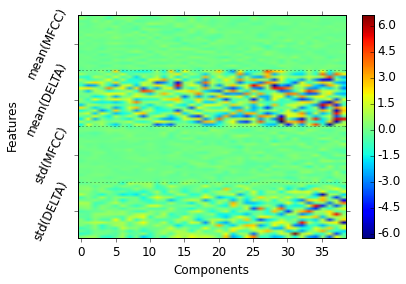

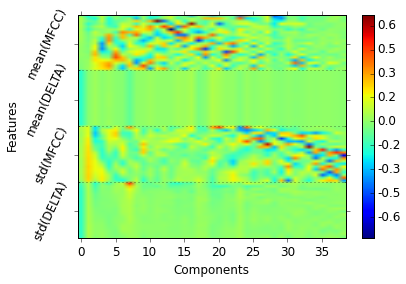

In [17]:
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = "12"

fig, ax = plt.subplots(1,1)
cax = ax.imshow(WW_lda[:, :n_components], aspect='auto')
fig.colorbar(cax, format="%1.1f")
ax.set_xlabel('Components')
ax.set_ylabel('Features')
y_loc = np.arange(10, 80, 20)
y_labs = ['mean(MFCC)', 'mean(DELTA)', 'std(MFCC)', 'std(DELTA)']
ax.set_yticks(y_loc)
ax.set_yticklabels(y_labs, rotation=65)
ax.set_yticks(np.arange(-0.5, 80, 20), minor=True)
ax.tick_params(which = 'major', direction = 'out')
ax.grid(which='minor')
plt.savefig('../data/lda_'+feat_labels[i]+'.pdf', bbox_inches='tight')
plt.savefig('../data/lda_'+feat_labels[i]+'.eps', bbox_inches='tight')

fig, ax = plt.subplots(1,1)
cax = ax.imshow(WW_pca[:, :n_components], aspect='auto')
fig.colorbar(cax, format="%1.1f")
ax.set_xlabel('Components')
ax.set_ylabel('Features')
y_loc = np.arange(10, 80, 20)
y_labs = ['mean(MFCC)', 'mean(DELTA)', 'std(MFCC)', 'std(DELTA)']
ax.set_yticks(y_loc)
ax.set_yticklabels(y_labs, rotation=65)
ax.set_yticks(np.arange(-0.5, 80, 20), minor=True)
ax.tick_params(which = 'major', direction = 'out')
ax.grid(which='minor')
plt.savefig('../data/pca_'+feat_labels[i]+'.pdf', bbox_inches='tight')
plt.savefig('../data/pca_'+feat_labels[i]+'.eps', bbox_inches='tight')

## Coefficients LDA classifier

In [18]:
#X_list, Y, Yaudio = pickle.load(open('../data/lda_data_melodia_8.pickle','rb'))
X_list, Y, Yaudio = pickle.load(open('../data/lda_data_melodia_8_30sec.pickle','rb'))
X = np.concatenate(X_list, axis=1)
print X.shape

(8200, 381)


In [28]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 12345
X_train, X_val_test, Y_train, Y_val_test = train_test_split(X, Y, train_size=0.6, 
                                                            random_state=RANDOM_STATE, stratify=Y)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_test, Y_val_test, train_size=0.5, 
                                                random_state=RANDOM_STATE, stratify=Y_val_test)
print X_train.shape, X_test.shape

(4920, 381) (1640, 381)


In [29]:
ssm_feat = util_feature_learning.Transformer()
ssm_feat.classify(X_train, Y_train, X_test, Y_test)

KNN   0.151978449974
LDA   0.320669835863
SVM   0.0231101788399
RF   0.0835140403541


,0,1,2
0,,KNN,0.151978
0,,LDA,0.320670
0,,SVM,0.023110
0,,RF,0.083514


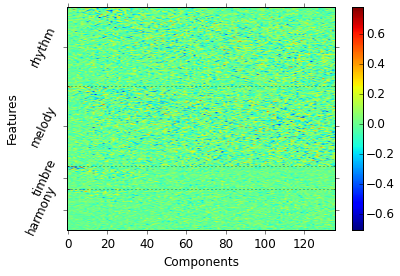

In [30]:
classifier_WW = ssm_feat.modelLDA.scalings_
fig, ax = plt.subplots(1,1)
cax = ax.imshow(classifier_WW, aspect='auto')
fig.colorbar(cax)
ax.set_xlabel('Components')
ax.set_ylabel('Features')
feat_lens = np.array([X_list[i].shape[1] for i in range(len(X_list))])
boundaries = np.concatenate([[0], np.cumsum(feat_lens)])
y_loc = np.diff(boundaries) / 2.0 + boundaries[:-1]
y_labs = ['rhythm', 'melody', 'timbre', 'harmony']
ax.set_yticks(y_loc)
ax.set_yticklabels(y_labs, rotation=65)
ax.set_yticks(np.cumsum(feat_lens)-0.5, minor=True)
ax.tick_params(which = 'major', direction = 'out')
ax.grid(which='minor')
plt.savefig('../data/lda_classifier.pdf')

In [31]:
# Explained Variance
print ssm_feat.modelLDA.explained_variance_ratio_

[ 0.04721971  0.02912967  0.02686693  0.02254878  0.02153725  0.02039771
  0.01986589  0.01923189  0.01808466  0.01780935  0.01616628  0.01607138
  0.0157854   0.01482804  0.01439551  0.01389537  0.01365861  0.01325603
  0.01296099  0.01286698  0.01257249  0.0122824   0.01193036  0.01155285
  0.01131997  0.01124585  0.01111148  0.01094982  0.01090344  0.0105174
  0.0104346   0.01022926  0.00992312  0.00978206  0.00941532  0.0092343
  0.0091473   0.00898126  0.00892137  0.00877803  0.00848339  0.00845506
  0.00823244  0.00815933  0.00807711  0.00786589  0.00768101  0.00763818
  0.00742049  0.0073726   0.00727466  0.00724382  0.00707704  0.00694127
  0.00691035  0.00673261  0.00656972  0.00646068  0.00633359  0.00629737
  0.00618425  0.00598117  0.00592615  0.00591875  0.00579374  0.00572274
  0.00553778  0.00548769  0.00539713  0.00533178  0.00526798  0.00525004
  0.00519216  0.00500364  0.00490137  0.00488262  0.0047429   0.00469763
  0.0045658   0.00449074  0.00441938  0.00429603  0.0